In [4]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode
from typing import Literal
import random


def agent(state):
    return {"messages":["user", "hello"]}

def should_continue(state: MessagesState):
    if random.randint / 2 == 1:
        return 'Tools'
    else:
        return END

# tool_node

@tool
def get_weather(location: str):
    """Dicstring"""
    return f"It's 60 degree in {location}"

@tool
def get_coolest_cities():
    """Dicstring"""
    return "Seoul"

# conditional edge

tools = [get_weather, get_coolest_cities]
tool_node = ToolNode(tools)


workflow = StateGraph(MessagesState)
workflow.add_node("Agent", agent)
workflow.add_node("Tools", tool_node)

workflow.add_edge(START, 'Agent')
workflow.add_conditional_edges(
    "Agent",
    should_continue,
)

workflow.add_edge('Tools', 'Agent')
app = workflow.compile()

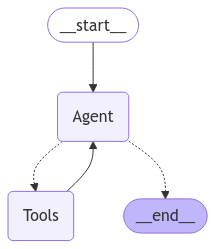

In [5]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))